In [241]:
# requirements
import numpy as np
import matplotlib.pyplot as plt
import cvxpy as cv

# Datasets

In [242]:
# dataset 4
n = 200
x_d4 = 3 * (np.random.rand(n, 4) - 0.5)
y_d4 = (2 * x_d4[:, 0] - 1 * x_d4[:,1] + 0.5 + 0.5 * np.random.randn(n)) > 0
y_d4 = 2 * y_d4 -1


In [244]:
# dataset 5
n = 200
x_d5 = 3 * (np.random.rand(n, 4) - 0.5)
W = np.array([[ 2,  -1, 0.5,],
              [-3,   2,   1,],
              [ 1,   2,   3]])
y_d5 = np.argmax(np.dot(np.hstack([x_d5[:,:2], np.ones((n, 1))]), W.T)
                        + 0.5 * np.random.randn(n, 3), axis=1)



# Problem 1

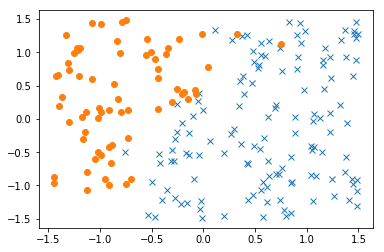

In [246]:
plt.plot(np.extract(y_d4>0,x_d4[:,0]),np.extract(y_d4>0,x_d4[:,1]), 'x')
plt.plot(np.extract(y_d4<0,x_d4[:,0]),np.extract(y_d4<0,x_d4[:,1]), 'o')


In [247]:
# batch steepest gradient method : binary classification
EPOCH = 500
loss_hist_batch_sgd = [0]*EPOCH# to store the history of loss J(w_t)
lamb = 0.01
w_sgd = np.random.rand(4)*0.1
lr = 0.01
dw_sgd = np.zeros(4)
n = 200

for epoch in range(EPOCH):
    for i in range(n):
        loss_hist_batch_sgd[epoch] += np.log((1+np.exp(-y_d4[i]*np.dot(w_sgd,x_d4[i].T))))
        dw_sgd += -y_d4[i]*x_d4[i]/(1+np.exp(y_d4[i]*np.dot(w_sgd,x_d4[i].T))) 
    #正則化項
    loss_hist_batch_sgd[epoch] += lamb*np.dot(w_sgd,w_sgd.T)
    dw_sgd += 2*lamb*w_sgd 
    #更新
    w_sgd = w_sgd - lr*dw_sgd
   

In [248]:
# Newton method : binary classification
EPOCH = 500
loss_hist_batch_nm = [0]*EPOCH# to store the history of loss J(w_t)
lamb = 0.01
w_nm = np.random.rand(4)*0.1
lr = 0.01
dw_nm = np.zeros(4)
d2w_nm = 0
n = 200

for epoch in range(EPOCH):
    for i in range(n):
        loss_hist_batch_nm[epoch] += np.log((1+np.exp(-y_d4[i]*np.dot(w_nm,x_d4[i].T))))
        #一階微分
        dw_nm += -y_d4[i]*x_d4[i]/(1+np.exp(y_d4[i]*np.dot(w_nm,x_d4[i].T))) 
        #二階微分
        d2w_nm += (y_d4[i]**2)*np.dot(x_d4[i],x_d4[i].T)*np.exp(y_d4[i]*np.dot(w_nm,x_d4[i].T))
        /(1+np.exp(y_d4[i]*np.dot(w_nm,x_d4[i].T)))**2
    #正則化項    
    loss_hist_batch_nm[epoch] += lamb*np.dot(w_nm,w_nm.T) 
    dw_nm += 2*lamb*w_nm 
    d2w_nm += 2*lamb
    #更新
    dwd2w_nm = dw_nm/d2w_nm
    w_nm = w_nm - lr*dwd2w_nm
    # implement batch steepest gradient method here

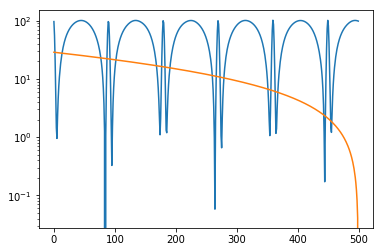

In [249]:
plt.plot(loss_hist_batch_sgd-min(loss_hist_batch_sgd))
plt.plot(loss_hist_batch_nm-min(loss_hist_batch_nm))
plt.yscale('log')

In [250]:
#softmax関数
def softmax(a):
    exp_a = np.exp(a)
    y= exp_a/np.sum(exp_a)
    return y
a = np.array([1,3,2])
b = np.ones((3,3))*2

In [251]:
# batch steepest gradient method : multi classification
EPOCH = 200
CLASS_NUM =3
loss_hist_batch_sgd_mc = [0]*EPOCH# to store the history of loss J(w_t)
w_sgd_mc = np.random.rand(CLASS_NUM,4)*0.1
lr = 0.01
dw_sgd_mc = np.zeros((CLASS_NUM,4))
E = np.eye(CLASS_NUM) #単位行列
n = 200
# implement batch steepest gradient method here
for epoch in range(EPOCH):
    for i in range(n):
        wx = np.dot(w_sgd_mc,x_d5[i].T)
        loss_hist_batch_sgd_mc[epoch] +=  -np.log(softmax(wx)[y_d5[i]])
        dw_sgd_mc +=  -np.dot((E[y_d5[i]]-softmax(wx)).reshape(CLASS_NUM,1),x_d5[i].reshape(1,4))
    #更新
    w_sgd_mc = w_sgd_mc - lr*dw_sgd_mc
   

In [252]:
# Newton method : multi classification
EPOCH = 200
CLASS_NUM =3
loss_hist_batch_nm_mc = [0]*EPOCH# to store the history of loss J(w_t)
w_nm_mc = np.random.rand(CLASS_NUM,4)*0.1
lr = 0.001
dw_nm_mc = np.zeros((CLASS_NUM,4))
d2w_nm_mc = np.zeros((CLASS_NUM))
E = np.eye(CLASS_NUM) #単位行列
n = 200

for epoch in range(EPOCH):
    for i in range(n):
        wx = np.dot(w_nm_mc,x_d5[i].T)
        loss_hist_batch_nm_mc[epoch] +=  -np.log(softmax(wx)[y_d5[i]])
        dw_nm_mc +=  -np.dot((E[y_d5[i]]-softmax(wx)).reshape(CLASS_NUM,1),x_d5[i].reshape(1,4))
        d2w_nm_mc += (E[y_d5[i]]-softmax(wx))*softmax(wx)[y_d5[i]]*(1-2*softmax(wx))*np.dot(x_d5[i].T,x_d5[i])
    #更新
    dwd2w_nm_mc = dw_nm_mc/d2w_nm_mc.reshape(CLASS_NUM,1)
    w_nm_mc = w_nm_mc - lr*dwd2w_nm_mc
   

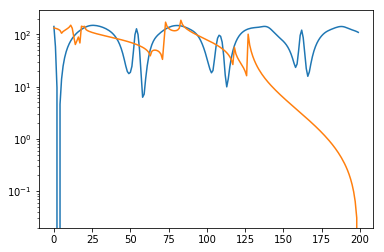

In [253]:
plt.plot(loss_hist_batch_sgd_mc-min(loss_hist_batch_sgd_mc))
plt.plot(loss_hist_batch_nm_mc-min(loss_hist_batch_nm_mc))
plt.yscale('log')

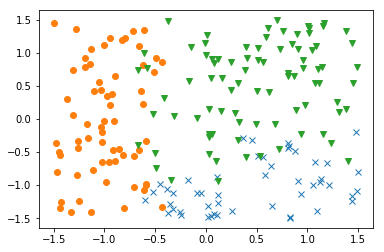

In [254]:
# 教師データ
plt.plot(np.extract(y_d5==0,x_d5[:,0]),np.extract(y_d5==0,x_d5[:,1]), 'x')
plt.plot(np.extract(y_d5==1,x_d5[:,0]),np.extract(y_d5==1,x_d5[:,1]), 'o')
plt.plot(np.extract(y_d5==2,x_d5[:,0]),np.extract(y_d5==2,x_d5[:,1]), 'v')

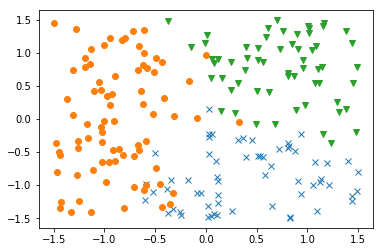

In [255]:
# batch steepest gradient method : multi classification
A = np.dot(w_sgd_mc,x_d5.T)
y_pre = np.zeros(n)
for i in range(n):
    c = np.argmax(A[:,i])
    y_pre[i] = c
plt.plot(np.extract(y_pre==0,x_d5[:,0]),np.extract(y_pre==0,x_d5[:,1]), 'x')
plt.plot(np.extract(y_pre==1,x_d5[:,0]),np.extract(y_pre==1,x_d5[:,1]), 'o')
plt.plot(np.extract(y_pre==2,x_d5[:,0]),np.extract(y_pre==2,x_d5[:,1]), 'v')

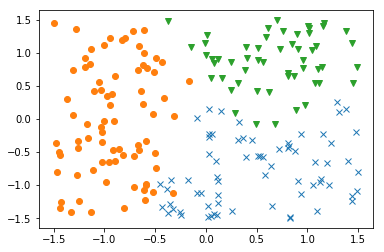

In [256]:
# Newton method : multi classification
A = np.dot(w_nm_mc,x_d5.T)
y_pre = np.zeros(n)
for i in range(n):
    c = np.argmax(A[:,i])
    y_pre[i] = c
plt.plot(np.extract(y_pre==0,x_d5[:,0]),np.extract(y_pre==0,x_d5[:,1]), 'x')
plt.plot(np.extract(y_pre==1,x_d5[:,0]),np.extract(y_pre==1,x_d5[:,1]), 'o')
plt.plot(np.extract(y_pre==2,x_d5[:,0]),np.extract(y_pre==2,x_d5[:,1]), 'v')

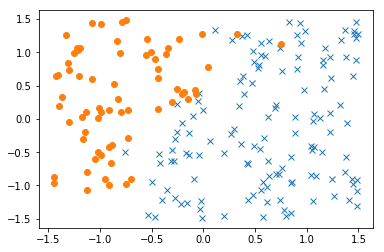

In [257]:
#教師データ
plt.plot(np.extract(y_d4>0,x_d4[:,0]),np.extract(y_d4>0,x_d4[:,1]), 'x')
plt.plot(np.extract(y_d4<0,x_d4[:,0]),np.extract(y_d4<0,x_d4[:,1]), 'o')

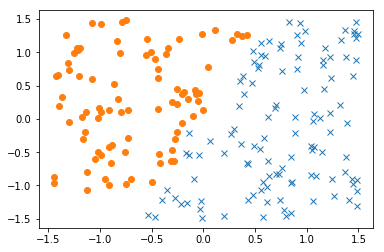

In [258]:
# batch steepest gradient method : binary classification
plt.plot(np.extract(np.dot(w_sgd,x_d4[:].T)>0,x_d4[:,0]),np.extract(np.dot(w_sgd,x_d4[:].T)>0,x_d4[:,1]), 'x')
plt.plot(np.extract(np.dot(w_sgd,x_d4[:].T)<0,x_d4[:,0]),np.extract(np.dot(w_sgd,x_d4[:].T)<0,x_d4[:,1]), 'o')

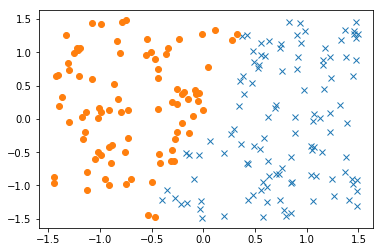

In [259]:
#Newton methodo: binary classification
plt.plot(np.extract(np.dot(w_nm,x_d4[:].T)>0,x_d4[:,0]),np.extract(np.dot(w_nm,x_d4[:].T)>0,x_d4[:,1]), 'x')
plt.plot(np.extract(np.dot(w_nm,x_d4[:].T)<0,x_d4[:,0]),np.extract(np.dot(w_nm,x_d4[:].T)<0,x_d4[:,1]), 'o')

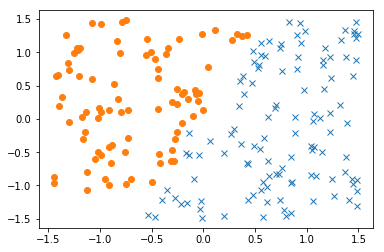

In [260]:
plt.plot(np.extract(np.dot(w_sgd,x_d4[:].T)>0,x_d4[:,0]),np.extract(np.dot(w_sgd,x_d4[:].T)>0,x_d4[:,1]), 'x')
plt.plot(np.extract(np.dot(w_sgd,x_d4[:].T)<0,x_d4[:,0]),np.extract(np.dot(w_sgd,x_d4[:].T)<0,x_d4[:,1]), 'o')